In [81]:
### Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE


from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

In [82]:
### Loading the datasheet
bike_sharing_df=pd.read_csv('day.csv')


In [83]:
bike_sharing_df.shape

(730, 16)

In [84]:
bike_sharing_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


##  EDA

### 1. Data Cleaning Process

#### Befor Starting any Data analysis we need to follow below Data Cleaning Process, which is required for any data analysis.

    1. Fixing rows and column
    2. Null Values/Missing Values
    3. Standardizing values
        a. Standardise units
        b. Remove Outliers
    4. invalid Values
    5. filtering data
    6. Visualizing data
 

* As we have seen data set has no any header and footer comment. so we dont need to do fixing row and column

#### Lets find "Null values" in Bike Sharing data set

In [85]:
bike_sharing_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### As we can see there are no any null values in Datasheet. So we dont need to remove null/missing values

### Let us see if there are any columns with "unique or single" values in them.

In [86]:
get_unique_columns=bike_sharing_df.nunique()
print(get_unique_columns)

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64


#### We can see there are no any unique value in Datasheet. So we dont need to drop any columns.

#### There are some column which are not significant for Bike sharing analysis lets remove them.

In [87]:
bike_sharing_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Lets remove unwanted rows which are not necessory in our analysys. 

In [88]:
# instant has only index for the row
bike_sharing_df.drop(['instant'],axis=1,inplace=True)

In [89]:
#dteday does not have any significant value for analysis as we have smilar column available like yr,mnth,weekday etc. drop it straight away
bike_sharing_df.drop(['dteday'],axis=1,inplace=True)


In [90]:
# casual and registered seems to be the breakup by category for cnt column.
bike_sharing_df.drop(['casual','registered'],axis=1,inplace=True)

In [91]:
# renaming few columns for better readibility

bike_sharing_df.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)



In [92]:
bike_sharing_df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


###  Standardising Values

* Season column is categorical column with each value corresponding to specific season.
* We need to map these numbers to respectie seasons

In [93]:
bike_sharing_df['season'].replace({1:"spring",2:"summer",3:"fall",4:"winter"},inplace=True)

* weathersit column is categorical column with each value corresponding to specific weathersit.
* We need to map these numbers to respectie weathersit


In [94]:
bike_sharing_df.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)


* weekday column is categorical column with each value corresponding to specific weekday.
* We need to map these numbers to respectie weekday

In [95]:
bike_sharing_df['weekday'].replace({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"},inplace=True)


In [96]:
bike_sharing_df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,1,0,Saturday,0,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,Sunday,0,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,Monday,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,Tuesday,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,Wednesday,1,good,9.305237,11.46350,43.6957,12.522300,1600


* month column is categorical column with each value corresponding to specific month.
* We need to map these numbers to respectie month

In [97]:
bike_sharing_df['month'].replace({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'},inplace=True)

In [98]:
bike_sharing_df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,Saturday,0,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,Sunday,0,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,Monday,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,Tuesday,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,Wednesday,1,good,9.305237,11.46350,43.6957,12.522300,1600


In [99]:
# check the column info,datatype of the dataset
bike_sharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


* We can see there are no any missing values. so we dont need to replace any null value

###  Outliers Process
#### Let's find out outliers on numerical variables which could possibly have outliers.

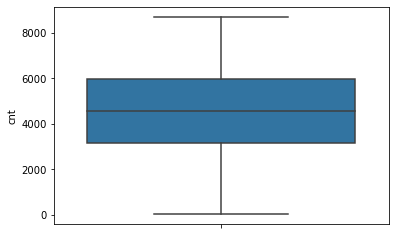

In [100]:
#### cnt has numeric values, Let's find out outliers
sns.boxplot(y=bike_sharing_df['cnt'])
plt.show()

* We can see there are no any outliers. so no need to remove outliers

### 2. Analyzing  The Data (Uni-variate,Multivariate and Segmented)

1. Now we have clean the data and will analyse and visualize the data.
2. The management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations.

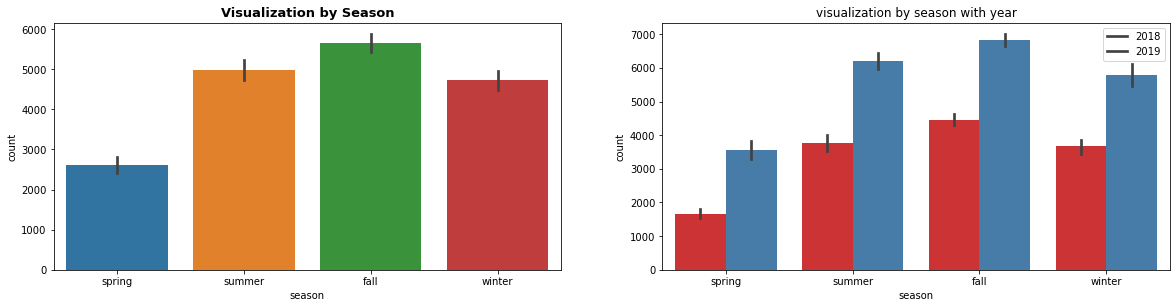

In [101]:
### Analyzing by Season
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.barplot(y='cnt',x='season',data=bike_sharing_df)
plt.title('Visualization by Season',weight='bold').set_fontsize('13')
plt.ylabel('count')
plt.xlabel('season')

### Analyzing Season with year
plt.subplot(2,2,2)
sns.barplot(y='cnt',x='season',data=bike_sharing_df,hue='year',palette='Set1')
plt.title('visualization by season with year')
plt.ylabel('count')
plt.xlabel('season')
plt.legend(labels=['2018', '2019'])
plt.show()

* We can see Fall season seems more booking of bike among other season.
* We can see the in each season demand of bike is drastically increasing from 2018 to 2019.

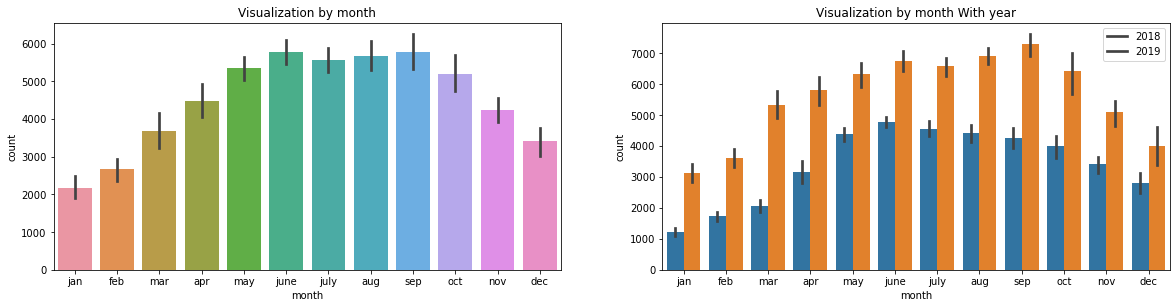

In [102]:
### Analyzing bike demand with month.
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.barplot(y='cnt',x='month',data=bike_sharing_df)
plt.title('Visualization by month')
plt.ylabel('count')
plt.xlabel('month')

### Analyzing bike demand with month and year.
plt.subplot(2,2,2)
sns.barplot(y='cnt',x='month',data=bike_sharing_df,hue='year')
plt.title('Visualization by month With year')
plt.ylabel('count')
plt.xlabel('month')
plt.legend(labels=['2018', '2019'])
plt.show()


* The demand of bike is high in may,june,july,august,sep,oct and less demand in last two month.
* Booking demand is increasing from 2018 to 2019.

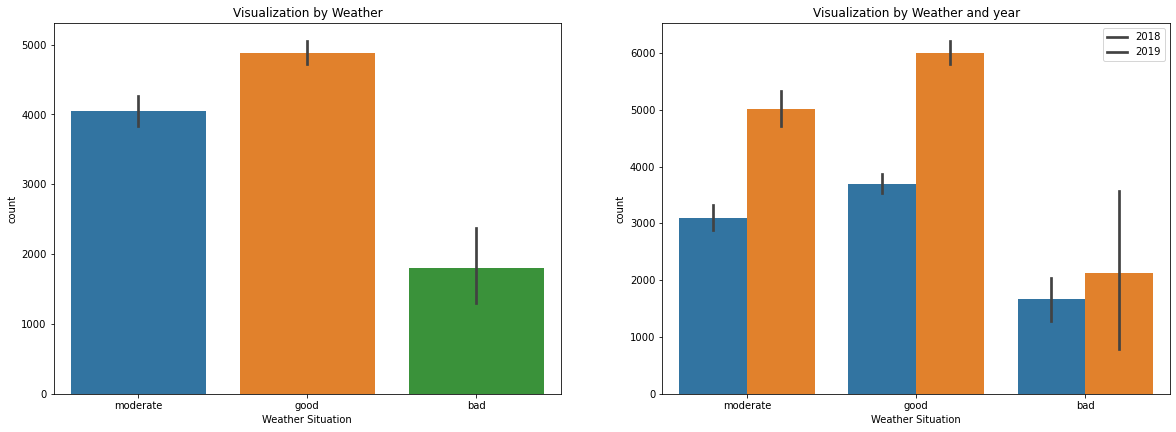

In [103]:
#Analyzing weather situation
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
sns.barplot(y='cnt',x='weathersit',data=bike_sharing_df)
plt.title('Visualization by Weather')
plt.ylabel('count')
plt.xlabel('Weather Situation')
           
#Analyzing weather situation     
plt.subplot(2,2,2)
sns.barplot(y='cnt',x='weathersit',data=bike_sharing_df,hue='year')
plt.title('Visualization by Weather and year')
plt.ylabel('count')
plt.xlabel('Weather Situation')
plt.legend(labels=['2018', '2019'])
plt.show()


* The demand of bike booking is high in good weather situation.
* also demand of bike booking is drastically increase in 2019 when weather situation is good.


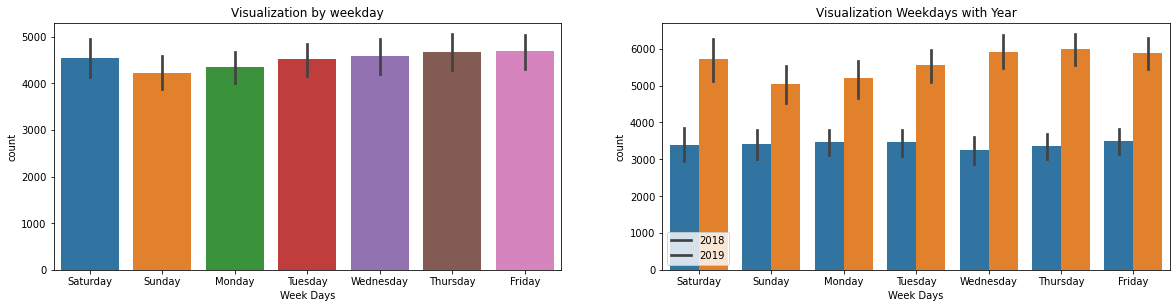

In [104]:
#Analyzing by Weekdays
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.barplot(y='cnt',x='weekday',data=bike_sharing_df)
plt.title('Visualization by weekday')
plt.ylabel('count')
plt.xlabel('Week Days')

#Analyzing by Weekdays with Year
plt.subplot(2,2,2)
sns.barplot(y='cnt',x='weekday',data=bike_sharing_df,hue='year')
plt.title('Visualization Weekdays with Year')
plt.ylabel('count')
plt.xlabel('Week Days')
plt.legend(labels=['2018', '2019'])
plt.show()


* Booking Demand is high in Thursday,Friday and Saturday
* also number of booking is high in year 2019 compare to year 2018 

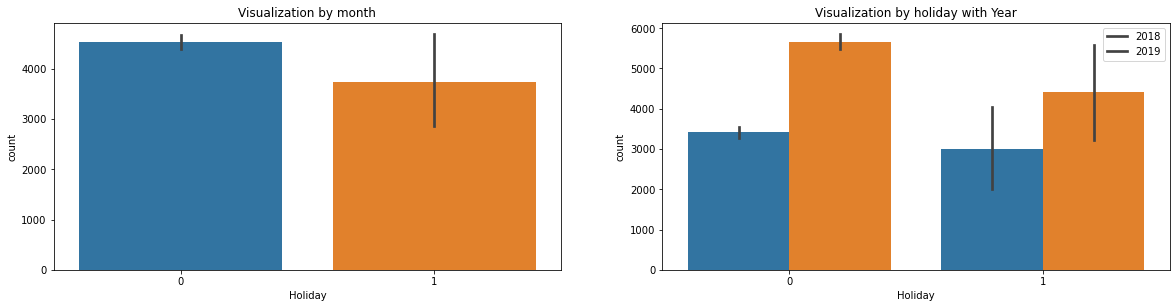

In [105]:
#Analyzing by Holiday
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.barplot(y='cnt',x='holiday',data=bike_sharing_df)
plt.title('Visualization by month')
plt.ylabel('count')
plt.xlabel('Holiday')

#Analyzing by Holiday with Year
plt.subplot(2,2,2)
sns.barplot(y='cnt',x='holiday',data=bike_sharing_df,hue='year')
plt.title('Visualization by holiday with Year')
plt.ylabel('count')
plt.xlabel('Holiday')
plt.legend(labels=['2018', '2019'])
plt.show()


* The demand of bike booking is high in Holiday.
* The demand of bike booking is low in holiday of 2019 Year.
* The demand of Bike Booking is High in working days of 2018

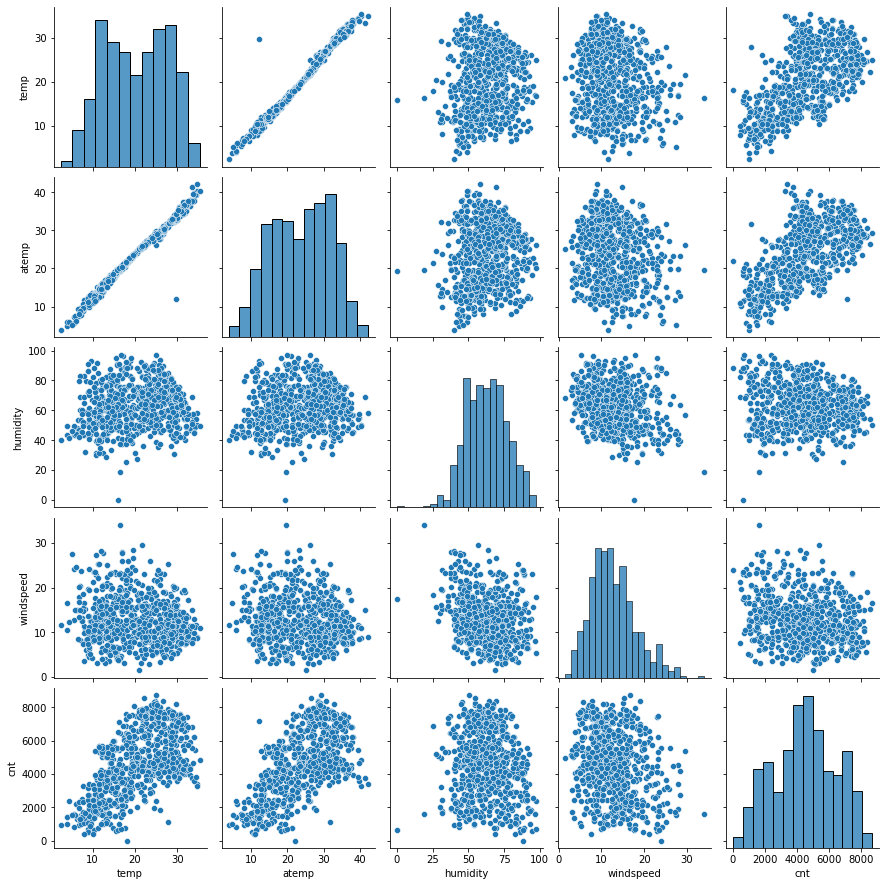

In [106]:
# Analysing/visualizing the numerical columns
sns.pairplot(data=bike_sharing_df,vars=['temp','atemp','humidity','windspeed','cnt'])
plt.show()

In [107]:
# Checking correlation
bike_sharing_df.corr()


,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt
year,1.000000,0.008195,-0.002945,0.048789,0.047215,-0.112547,-0.011624,0.569728
holiday,0.008195,1.000000,-0.252948,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
workingday,-0.002945,-0.252948,1.000000,0.053470,0.052940,0.023202,-0.018666,0.062542
temp,0.048789,-0.028764,0.053470,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.047215,-0.032703,0.052940,0.991696,1.000000,0.141512,-0.183876,0.630685
humidity,-0.112547,-0.015662,0.023202,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.011624,0.006257,-0.018666,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,0.569728,-0.068764,0.062542,0.627044,0.630685,-0.098543,-0.235132,1.000000


#### *From above table and pairplot it can be observed that temp and atemp is highly correlated.

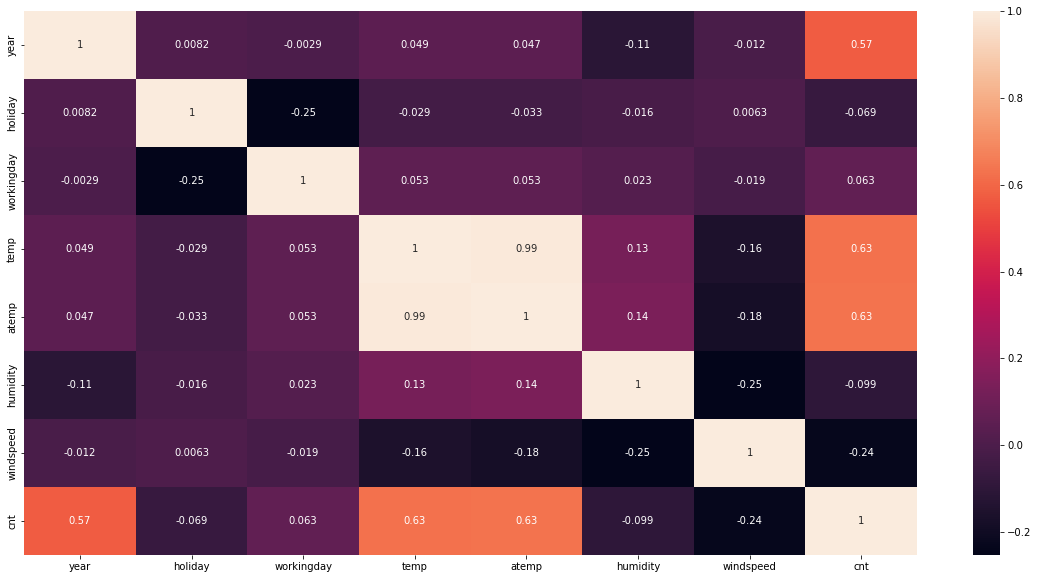

In [108]:
#Calculating Correlation
bike_corr = bike_sharing_df.corr()
plt.figure(figsize=(20,10))

#Drawing Heatmap of correlation
sns.heatmap(bike_corr,annot=True, )
plt.show()

* From this we can say that, temp,atemp seems correlated with cnt. Let's see a regplot for temp vs cnt.

### Visualising categorical Variables to understand data better

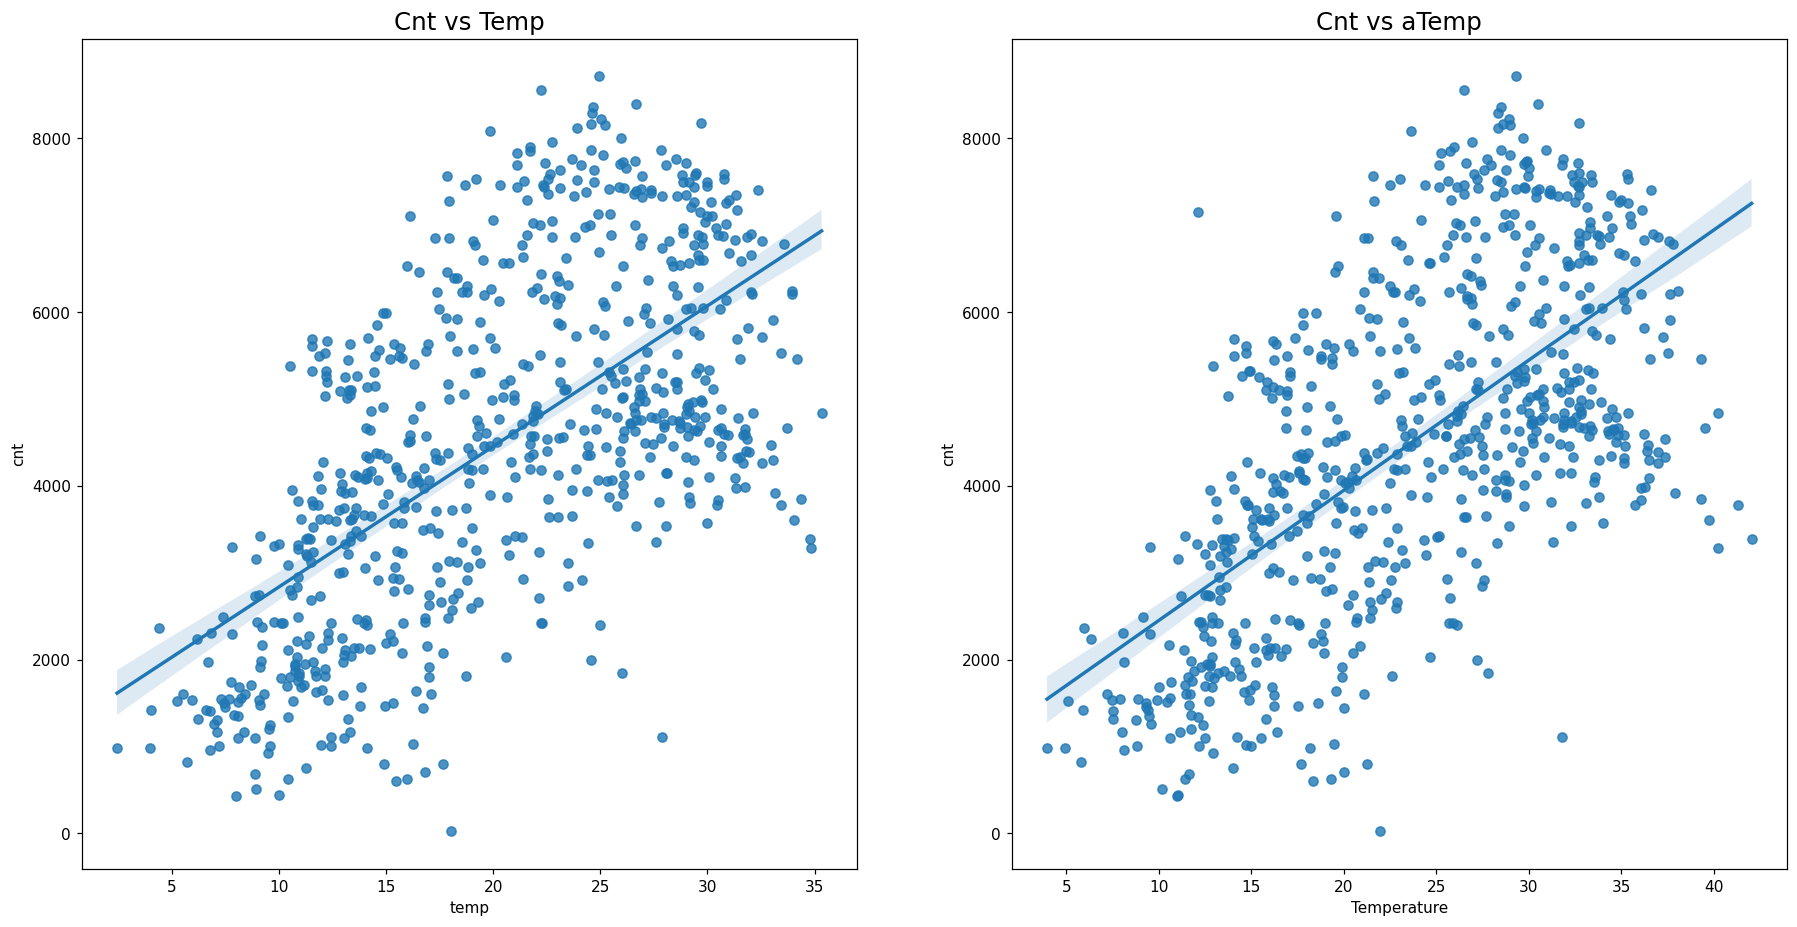

In [109]:
plt.figure(figsize=(20,10),dpi=110)
plt.subplot(1,2,1)
plt.title("Cnt vs Temp",fontsize=16)
sns.regplot(data=bike_sharing_df,y="cnt",x="temp")
plt.subplot(1,2,2)
plt.title("Cnt vs aTemp",fontsize=16)
sns.regplot(data=bike_sharing_df,y="cnt",x="atemp")
plt.xlabel("Temperature")
plt.show()

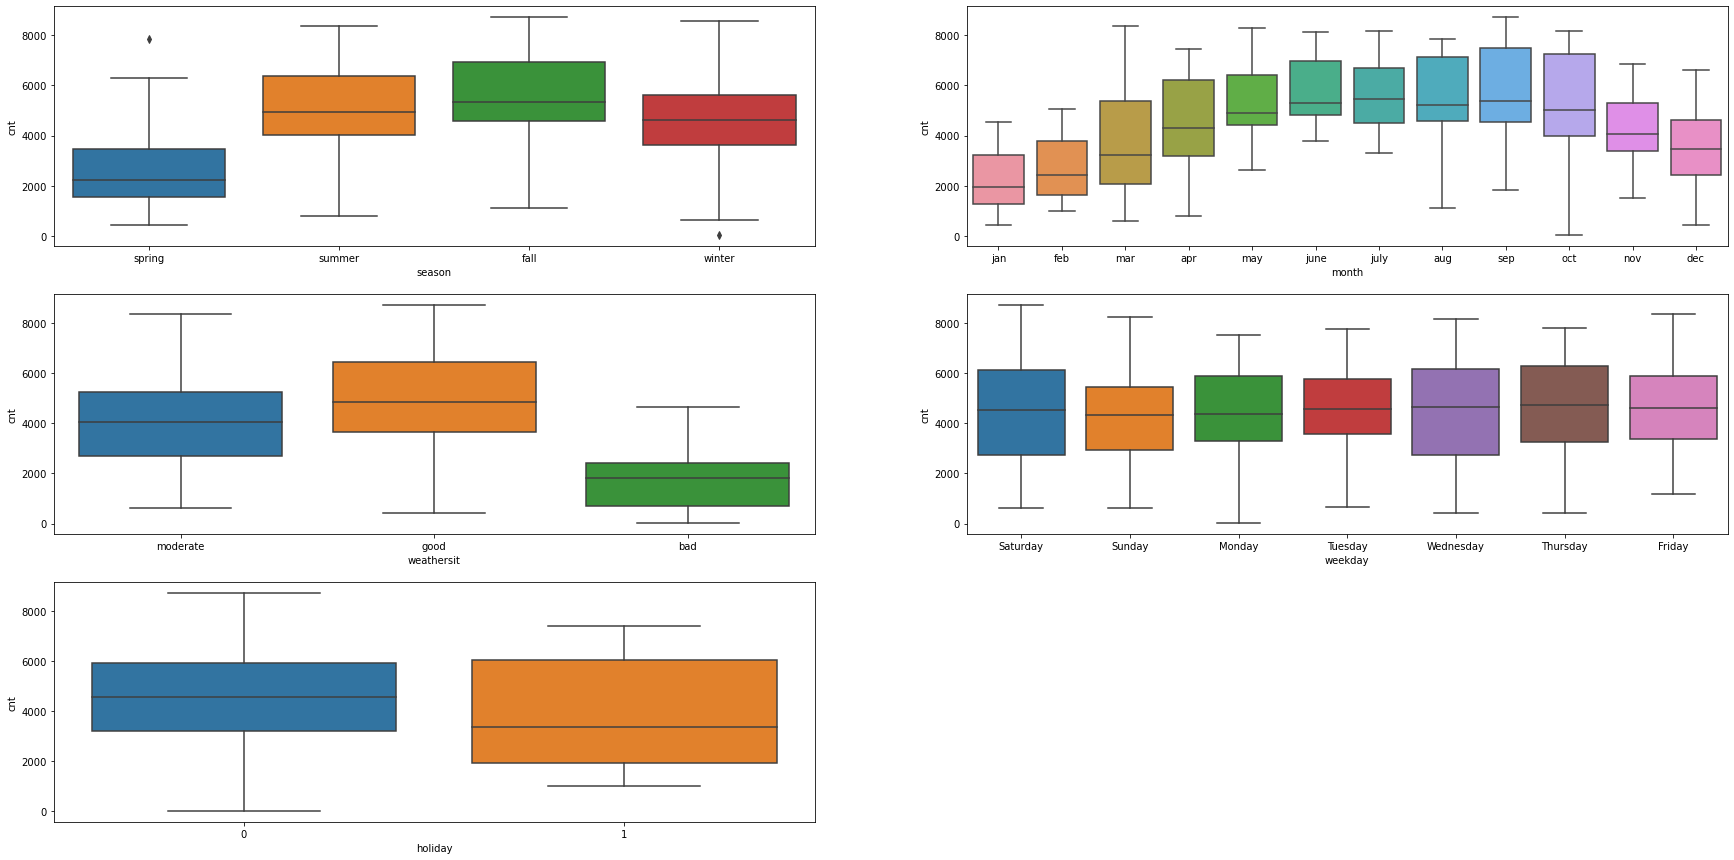

In [110]:
plt.figure(figsize=(30, 15))
plt.subplot(3,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_sharing_df)
plt.subplot(3,2,2)
sns.boxplot(x = 'month', y = 'cnt', data = bike_sharing_df)
plt.subplot(3,2,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_sharing_df)
plt.subplot(3,2,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_sharing_df)
plt.subplot(3,2,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_sharing_df)
plt.show()

### Step 3: Data Preparation for  Modeling

* We will create DUMMY variables for 4 categorical variables 'mnth', 'weekday', 'season' & 'weathersit'.

    Before that we follow below steps..
    1. Encoding
            1. Check the datatypes before convertion
            2. Convert to 'category' data type
            3. Check the datatypes after convertion  
            4. Create Dummy variable
            5. Drop original variable for which the dummy was created
            6. Drop first dummy variable for each set of dummies created.
    2. Splitting the data into Train and Test Dataset
    3. Scaling of variables


In [111]:
# Check the datatypes before convertion
bike_sharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [112]:
# Convert to 'category' data type

#bike_sharing_df['season']=bike_sharing_df['season'].astype('category')
#bike_sharing_df['weathersit']=bike_sharing_df['weathersit'].astype('category')
#bike_sharing_df['month']=bike_sharing_df['month'].astype('category')
#bike_sharing_df['weekday']=bike_sharing_df['weekday'].astype('category')

In [113]:
# Check the datatypes after convertion
bike_sharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [114]:
# Create Dummy variable and Drop first
bike_sharing_df = pd.get_dummies(data=bike_sharing_df,columns=["season","month","weekday","weathersit"], drop_first=True)
bike_sharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 730 non-null    int64  
 1   holiday              730 non-null    int64  
 2   workingday           730 non-null    int64  
 3   temp                 730 non-null    float64
 4   atemp                730 non-null    float64
 5   humidity             730 non-null    float64
 6   windspeed            730 non-null    float64
 7   cnt                  730 non-null    int64  
 8   season_spring        730 non-null    uint8  
 9   season_summer        730 non-null    uint8  
 10  season_winter        730 non-null    uint8  
 11  month_aug            730 non-null    uint8  
 12  month_dec            730 non-null    uint8  
 13  month_feb            730 non-null    uint8  
 14  month_jan            730 non-null    uint8  
 15  month_july           730 non-null    uin

In [115]:
bike_sharing_df.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,season_spring,season_summer,...,month_oct,month_sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_good,weathersit_moderate
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,1,0


#### Splitting the data into Train and Test Dataset

In [116]:
#Train Test split with 70:30 ratio
np.random.seed(0)
df_train, df_test = train_test_split(bike_sharing_df, train_size = 0.7, random_state = 100)


In [117]:
df_train.shape

(510, 30)

In [118]:

df_test.shape

(220, 30)

In [119]:
df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,season_spring,season_summer,...,month_oct,month_sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_good,weathersit_moderate
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,0,0,0,1,0,1,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,1,0,...,0,0,0,0,1,0,0,0,1,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,...,0,0,0,1,0,0,0,0,0,1
111,0,0,1,13.803347,16.0977,72.9583,14.707907,1683,0,1,...,0,0,0,0,0,0,0,0,0,1


In [120]:
df_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,season_spring,season_summer,...,month_oct,month_sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_good,weathersit_moderate
184,0,1,0,29.793347,33.27085,63.7917,5.459106,6043,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,32.082500,36.04875,59.2083,7.625404,6211,0,1,...,0,0,0,0,0,0,0,1,1,0
299,0,0,1,19.270000,22.85230,81.2917,13.250121,2659,0,0,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,31.433347,34.24915,42.4167,13.417286,4780,0,0,...,0,0,0,0,0,0,0,1,1,0
152,0,0,1,29.315000,32.19710,30.5000,19.583229,4968,0,1,...,0,0,0,0,0,1,0,0,1,0


#### Rescaling the Features
    1. min-max scaling (normalisation):between 0 and 1
    2. Standardisation (mean-0 and sigma-1)
    
   This time we will use MinMax scaling 

In [121]:
#1. initiat an object
scaler=MinMaxScaler()

In [122]:
# Applying scaler() to all the columns except the 'yes-no' and 'dummy' variables
# we will apply scaler on numeric variable except 'yes-no' and dummy variable.

#1. create a list of numeric variable
num_vars = ['temp','atemp','humidity','windspeed','cnt']

#2. Fit on Data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,season_spring,season_summer,...,month_oct,month_sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_good,weathersit_moderate
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,1,0,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,1,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,1,0,0,0,0,0,1
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,0,0,0,0,0,0,1


In [123]:
df_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,season_spring,season_summer,...,month_oct,month_sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_good,weathersit_moderate
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,...,0.084314,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.625490,0.345098
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,...,0.278131,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.484471,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


* We can see min and max vaulue lies between 0 and 1. 

### Training the Model

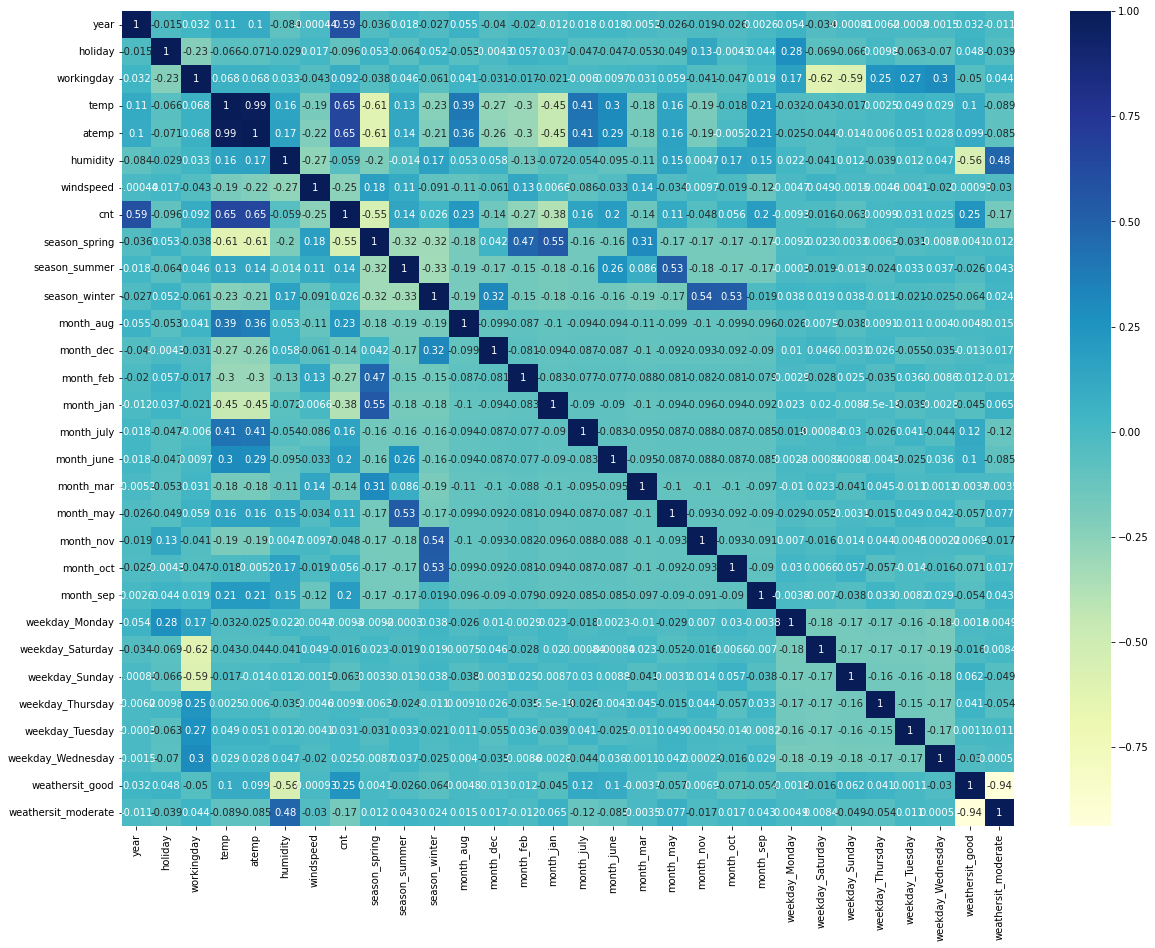

In [124]:
plt.figure(figsize=(20,15))
sns.heatmap(df_train.corr(),annot=True,cmap="YlGnBu")
plt.show()

* From this we can say that, 'atemp' and 'temp' seems correlated with 'cnt' the most. Let's see a regplot for temp vs cnt.

#### Dividing into X and Y sets for the model building

In [125]:
y_train = df_train.pop('cnt') #y to contain only target variable so eliminate 'cnt'
X_train = df_train

In [126]:
y_train.head() ###checking y_train variable

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

#### Build model using RFE

* RFE (Recursive feature elimination)

    Recursive feature elimination: We will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)


In [127]:
# We have already imported the required libraries
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm,n_features_to_select=15)             
rfe = rfe.fit(X_train, y_train)

In [128]:
#List of variables selected in top 15 list
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('month_aug', False, 8),
 ('month_dec', False, 4),
 ('month_feb', False, 5),
 ('month_jan', False, 2),
 ('month_july', True, 1),
 ('month_june', False, 13),
 ('month_mar', False, 15),
 ('month_may', False, 7),
 ('month_nov', False, 3),
 ('month_oct', False, 12),
 ('month_sep', True, 1),
 ('weekday_Monday', False, 9),
 ('weekday_Saturday', True, 1),
 ('weekday_Sunday', True, 1),
 ('weekday_Thursday', False, 11),
 ('weekday_Tuesday', False, 10),
 ('weekday_Wednesday', False, 14),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', True, 1)]

In [129]:
# selecting the selected variable via RFE in col list
col = X_train.columns[rfe.support_]
print(col)

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'month_july',
       'month_sep', 'weekday_Saturday', 'weekday_Sunday', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')


In [130]:
# checking which columns has been rejected
X_train.columns[~rfe.support_]


Index(['atemp', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_june', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'weekday_Monday', 'weekday_Thursday', 'weekday_Tuesday',
       'weekday_Wednesday'],
      dtype='object')

#### Model 1

In [131]:
### Creating x_train variable with rfe selected variable
X_train_rfe=X_train[col]

### Add constant variable
X_train_rfe=sm.add_constant(X_train_rfe)

### Running the linear model
lm=sm.OLS(y_train,X_train_rfe).fit()

### lets see the summary of our Liner model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Mon, 12 Sep 2022   Prob (F-statistic):          2.11e-191
Time:                        21:04:35   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0035    

In [132]:
 ####Calculate the VIFs for the model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,holiday,inf
3,workingday,inf
12,weekday_Saturday,inf
13,weekday_Sunday,inf
14,weathersit_good,10.25
15,weathersit_moderate,8.87
7,season_spring,5.02
4,temp,3.62
9,season_winter,3.49
8,season_summer,2.62


* We can drop holiday as it shows infinte VIF which show multicolinearity

#### Model 2

In [133]:
# Dropping the holiday column
X_train_new = X_train_rfe.drop(["holiday"], axis = 1)

### Add constant variable
X_train_lm1=sm.add_constant(X_train_new)

### Running the linear model
lm2=sm.OLS(y_train,X_train_lm1).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Mon, 12 Sep 2022   Prob (F-statistic):          2.11e-191
Time:                        21:04:35   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0639    

In [134]:
 ####Calculate the VIFs for the model
vif = pd.DataFrame()
X = X_train_lm1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,182.92
13,weathersit_good,10.25
2,workingday,9.07
14,weathersit_moderate,8.87
11,weekday_Saturday,6.06
12,weekday_Sunday,5.74
6,season_spring,5.02
3,temp,3.62
8,season_winter,3.49
7,season_summer,2.62


#### Model 3

 * We can drop weathersit_good as it shows infinte VIF which show multicolinearity

In [135]:
# Dropping the holiday column
X_train_new = X_train_new.drop(["weathersit_good"], axis = 1)

### Add constant variable
X_train_lm2=sm.add_constant(X_train_new)

### Running the linear model
lm3=sm.OLS(y_train,X_train_lm2).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     173.5
Date:                Mon, 12 Sep 2022   Prob (F-statistic):          5.61e-175
Time:                        21:04:35   Log-Likelihood:                 475.76
No. Observations:                 510   AIC:                            -923.5
Df Residuals:                     496   BIC:                            -864.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2513    

#### Model 4

 * We can drop season_spring as it shows high P which show multicolinearity

In [136]:
# Dropping the holiday column
X_train_new = X_train_new.drop(["season_spring"], axis = 1)

### Add constant variable
X_train_lm4=sm.add_constant(X_train_new)

### Running the linear model
lm4=sm.OLS(y_train,X_train_lm4).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     186.7
Date:                Mon, 12 Sep 2022   Prob (F-statistic):          2.33e-175
Time:                        21:04:36   Log-Likelihood:                 473.95
No. Observations:                 510   AIC:                            -921.9
Df Residuals:                     497   BIC:                            -866.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2049    

#### Model 5

 * We can drop weekday_Sunday as it shows high P which show multicolinearity

In [137]:
# Dropping the holiday column
X_train_new = X_train_new.drop(["weekday_Saturday"], axis = 1)

### Add constant variable
X_train_lm5=sm.add_constant(X_train_new)

### Running the linear model
lm5=sm.OLS(y_train,X_train_lm5).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     198.2
Date:                Mon, 12 Sep 2022   Prob (F-statistic):          6.03e-174
Time:                        21:04:36   Log-Likelihood:                 467.84
No. Observations:                 510   AIC:                            -911.7
Df Residuals:                     498   BIC:                            -860.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2902    

#### Model 6

 * We can drop weekday_Sunday as it shows high P which show multicolinearity

In [138]:
# Dropping the holiday column
X_train_new = X_train_new.drop(["workingday"], axis = 1)

### Add constant variable
X_train_lm6=sm.add_constant(X_train_new)

### Running the linear model
lm6=sm.OLS(y_train,X_train_lm6).fit()
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     218.3
Date:                Mon, 12 Sep 2022   Prob (F-statistic):          4.48e-175
Time:                        21:04:36   Log-Likelihood:                 467.72
No. Observations:                 510   AIC:                            -913.4
Df Residuals:                     499   BIC:                            -866.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2941    

#### Model 7

 * We can drop weathersit_moderate as it shows high P which show multicolinearity

In [139]:
#Dropping the const 
X_train_new = X_train_new.drop(['const'], axis=1)

# Dropping the holiday column
X_train_new = X_train_new.drop(["weathersit_moderate"], axis = 1)

### Add constant variable
X_train_lm7=sm.add_constant(X_train_new)

### Running the linear model
lm7=sm.OLS(y_train,X_train_lm7).fit()
print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     240.7
Date:                Mon, 12 Sep 2022   Prob (F-statistic):          2.00e-175
Time:                        21:04:36   Log-Likelihood:                 465.71
No. Observations:                 510   AIC:                            -911.4
Df Residuals:                     500   BIC:                            -869.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3082      0.027     11.

In [140]:
 ####Calculate the VIFs for the model
vif = pd.DataFrame()
X = X_train_lm7
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,38.31
2,temp,1.53
7,month_july,1.43
5,season_summer,1.33
6,season_winter,1.27
8,month_sep,1.19
3,humidity,1.17
4,windspeed,1.13
1,year,1.03
9,weekday_Sunday,1.00


* From the VIF calculation we could find that there is no multicollinearity existing between the predictor variables, as all the values are within permissible range of below 5


* Now that we VIF which is acceptable and p-value for all the features is almost 0.0 
and R2 is 0.812 we will go with this model as our final model as it has all important statistics like high (R-square, Adjusted R-squared and F-statistic), Also it shows no insignificant variables and no multicollinearty (high VIF) variables. The difference between R-square and Adjusted R-square is 0.003 which shows that no further variables are required to be removed from this model.


* We can cosider the above model i.e lm7, as it seems to have very low multicolinearity between the predictors and the p-values for all the predictors seems to be significant.


* F-Statistics value of 240.4 (which is greater than 1) and the p-value of 2.00e-175 i.e almost equals to zero, states that the overall model is 


* So we consider linear mode 7 (lm7)

In [141]:
# Checking the parameters and their coefficient values
lm7.params


const             0.308164
year              0.228216
temp              0.629691
humidity         -0.344556
windspeed        -0.238795
season_summer     0.082746
season_winter     0.133497
month_july       -0.051910
month_sep         0.087175
weekday_Sunday   -0.032801
dtype: float64

### Step 4: Residual Analysis of the train data and validation

In [142]:
X_train_lm7

,const,year,temp,humidity,windspeed,season_summer,season_winter,month_july,month_sep,weekday_Sunday
576,1.0,1,0.815169,0.725633,0.264686,0,0,1,0,0
426,1.0,1,0.442393,0.640189,0.255342,0,0,0,0,0
728,1.0,1,0.245101,0.498067,0.663106,0,0,0,0,1
482,1.0,1,0.395666,0.504508,0.188475,1,0,0,0,0
111,1.0,0,0.345824,0.751824,0.380981,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0.863973,0.679690,0.187140,0,0,0,0,0
53,1.0,0,0.202618,0.435939,0.111379,0,0,0,0,0
350,1.0,0,0.248216,0.577930,0.431816,0,1,0,0,0
79,1.0,0,0.462664,0.759870,0.529881,1,0,0,0,0


In [143]:
y_train_pred = lm7.predict(X_train_lm7)


#### Normality of error terms

Text(0.5, 0, 'Errors')

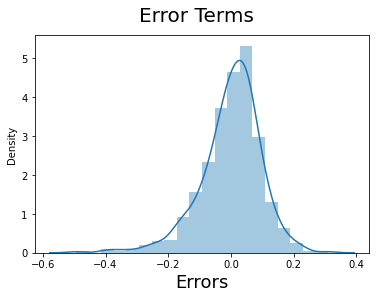

In [144]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

#### The distribution plot of error term shows the normal distribution with mean at Zero.

### Step 5: Making Predictions Using the Final Mode

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final model

In [145]:
#1. create a list of numeric variable for Applying the scaling on the test sets

num_vars = ['temp','atemp','humidity','windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])


#### Dividing into X_test and y_test

In [146]:
y_test = df_test.pop('cnt')
X_test = df_test

In [147]:
# Now let's use our model to make predictions.
col1 = X_train_new.columns
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[col1]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)



#### Making predictions

In [148]:
# Making predictions
y_pred = lm7.predict(X_test_new)

r2 = r2_score(y_test, y_pred)
round(r2,4)

0.8017

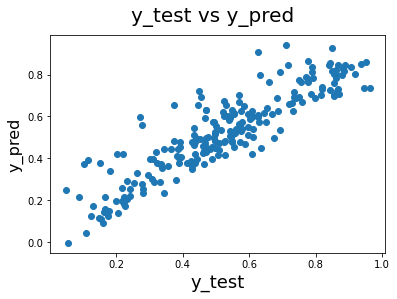

In [151]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()



In [154]:
round(lm7.params,3)

const             0.308
year              0.228
temp              0.630
humidity         -0.345
windspeed        -0.239
season_summer     0.083
season_winter     0.133
month_july       -0.052
month_sep         0.087
weekday_Sunday   -0.033
dtype: float64

#### Interpretation of Coefficients:

<b>temp:</b> A coefficient value of ‘0.630’ indicated that a unit increase in temp variable, increases the bike hire numbers by 0.630 units.

<b>humidity:</b> A coefficient value of ‘-0.345’ indicated that, a unit increase in Weathersit3 variable, decreases the bike hire numbers by 0.345 units.

<b>year:</b> A coefficient value of ‘0.228’ indicated that a unit increase in yr variable, increases the bike hire numbers by 0.228 units.

<b>season_summer:</b> A coefficient value of ‘0.083’ indicated that a unit increase in season_4 variable increases the bike hire numbers by 0.083 units.

<b>windspeed:</b> A coefficient value of ‘-0.239’ indicated that, a unit increase in windspeed variable decreases the bike hire numbers by 0.239 units.

<b>season_winter:</b> A coefficient value of ‘0.133’ indicated that, a unit increase in workingday variable increases the bike hire numbers by 0.133 units.

<b>month_july:</b> A coefficient value of ‘0.052’ indicated that a unit increase in month_july variable decreases the bike hire numbers by 0.052 units.

<b>month_sep:</b> A coefficient value of ‘0.087’ indicated that , a unit increase in month_sep variable increases the bike hire numbers by 0.087 units.

<b>weekday_Sunday:</b> A coefficient value of ‘0.033’ indicated that , a unit increase in weekday_Sunday variable increases the bike hire numbers by 0.033 units.

<b>const:</b> The Constant value of ‘0.308’ indicated that, in the absence of all other predictor variables (i.e. when x1,x2...xn =0), The bike rental can still increase by 0.308 units.


#### We can see that the equation of our best fitted line is:

cnt=0.308+(0.228×yr)+(0.630×temp)-(0.345×humidity)−(0.239×windspeed)+(0.083×season_summer)+(0.133×season_winter)-(0.052×month_july)+(0.087×month_sep)−(0.033×weekday_Sunday)

In [705]:
# Calculating Adjusted-R^2 value for the test dataset
adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7714


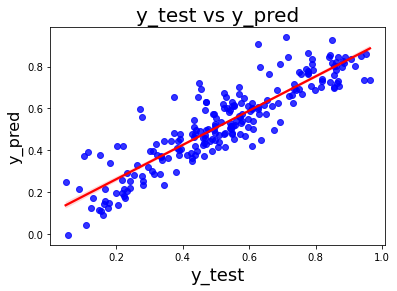

In [153]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

### Comparision between Training and Testing dataset:

- Train dataset R^2          : 0.812
- Test dataset R^2           : 0.8038
- Train dataset Adjusted R^2 : 0.809    
- Test dataset Adjusted R^2  : 0.7714

Demand of bikes depend on year, holiday, temp, windspeed, sep, Light_snowrain, Misty, spring, summer and winter.

### FINAL REPORT

#### As per our final Model, the top 3 predictor variables that influences the bike booking are:

   <b>Temperature (temp) -</b> A coefficient value of ‘0.630’ indicated that a unit increase in temp variable increases the bike hire numbers by 0.630 units.
    
   <b>humidity -</b> A coefficient value of ‘-0.345’ indicated that, a unit increase in humidity variable decreases the bike hire numbers by 0.345 units.
    
   <b>Year -</b> A coefficient value of ‘0.228’ indicated that a unit increase in Year variable increases the bike hire numbers by 0.228 units.

    *So, it's suggested to consider these variables utmost importance while planning, to achive maximum Booking

#### The next best features that can also be considered are

   <b>season_summer: -</b> A coefficient value of ‘0.083’ indicated that, a unit increase in season_summer variable increases the bike hire numbers by 0.083 units.

   <b>windspeed: -</b> A coefficient value of ‘-0.239’ indicated that, a unit increase in windspeed variable decreases the bike hire numbers by 0.239 units.

